In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os, json, math, librosa

import IPython.display as ipd
import librosa.display

import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D

import sklearn.model_selection as sk

from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define the path to the zip file
zip_file_path = '/content/drive/MyDrive/GTZAN/archive.zip'
extracted_path = '/content/drive/MyDrive/GTZAN/dataset/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print(f"Dataset extracted to {extracted_path}")

Dataset extracted to /content/drive/MyDrive/GTZAN/dataset/


In [ ]:
# Getting Genres from folder name

MUSIC = 'drive/MyDrive/GTZAN/archive/Data/genres_original/'
music_dataset = [] # File locations for each wav file
genre_target = [] #
for root, dirs, files in os.walk(MUSIC):
    for name in files:
        filename = os.path.join(root, name)
        if filename != 'drive/MyDrive/GTZAN/archive/Data/genres_original/jazz/jazz.00054.wav':
            music_dataset.append(filename)
            genre_target.append(filename.split("/")[5])

In [ ]:
# Displaying genres

print(set(genre_target))

{'genres_original'}


In [ ]:
# Testing Audio Files

audio_path = music_dataset[500]
# img_path = './data/images_original/blues/blues00011.png'

x , sr = librosa.load(audio_path)



librosa.load(audio_path, sr=None)

ipd.Audio(audio_path)

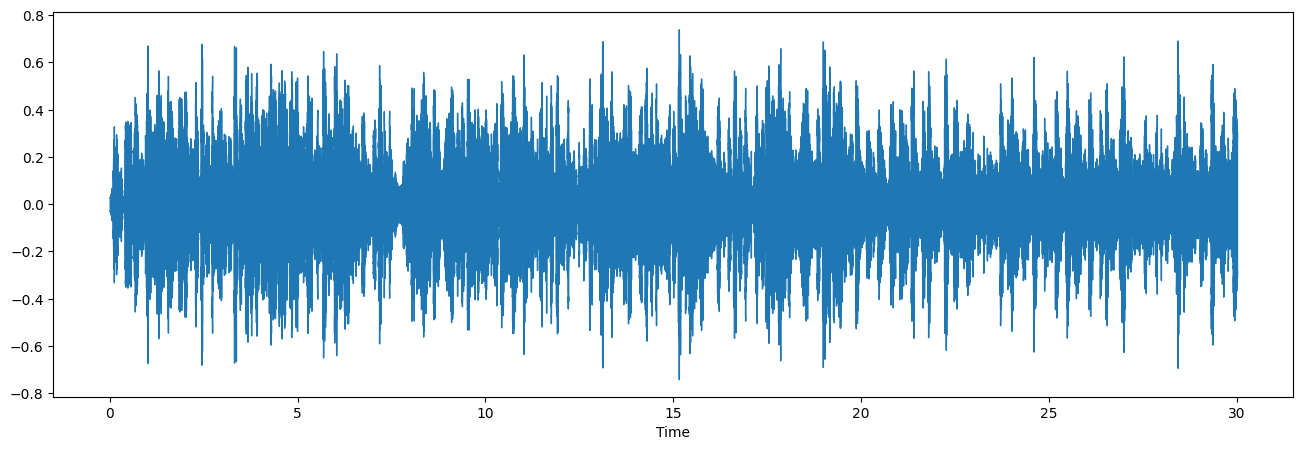

In [ ]:
# Visualizing Audio File as a waveform
plt.figure(figsize=(16, 5))
librosa.display.waveshow(x, sr=sr)

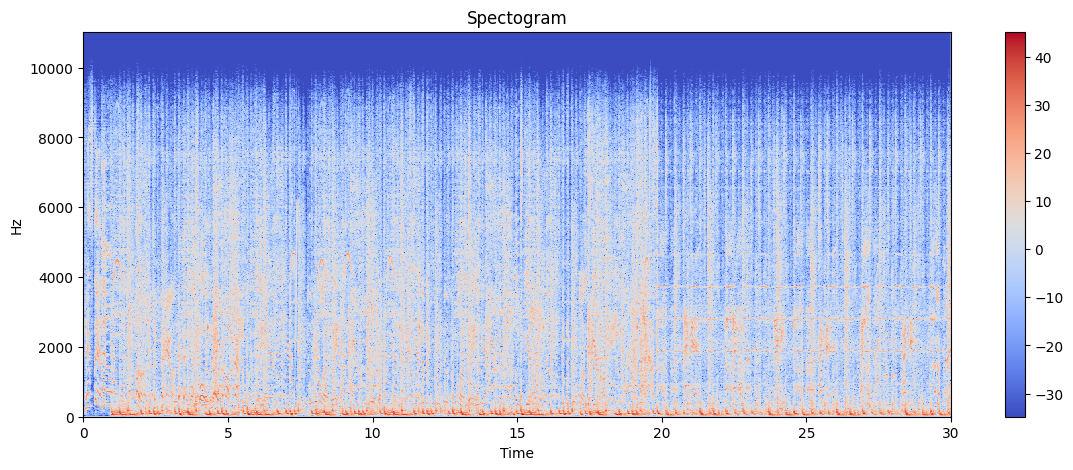

In [ ]:
# Visualizing audio file as a spectogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title('Spectogram')
plt.colorbar()

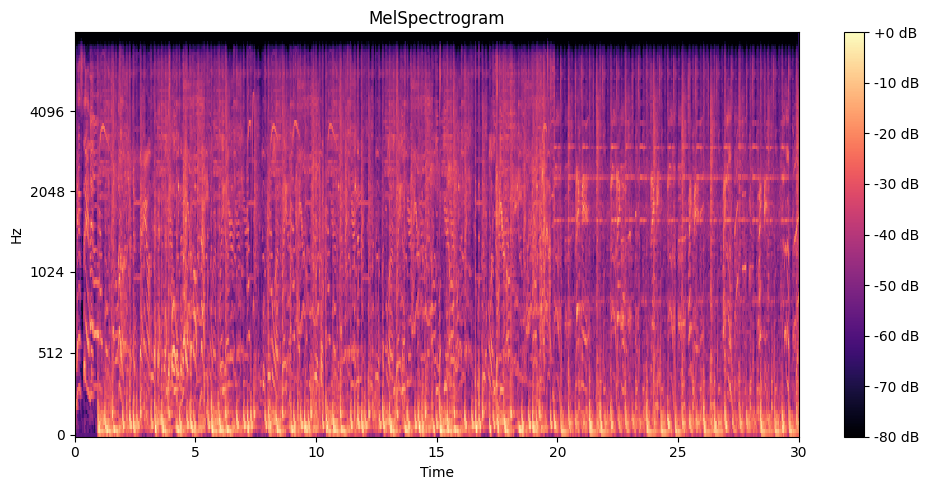

In [ ]:
# Visualizing Audio as Mel-Spectogram

file_location = audio_path
y, sr = librosa.load(file_location)
melSpec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
melSpec_dB = librosa.power_to_db(melSpec, ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(melSpec_dB, x_axis='time', y_axis='mel', sr=sr, fmax=8000)
plt.colorbar(format='%+1.0f dB')
plt.title("MelSpectrogram")
plt.tight_layout()
plt.show()

In [ ]:
import os
import math
import json
import librosa

DATASET_PATH = 'drive/MyDrive/GTZAN/dataset/Data/genres_original/'
JSON_PATH = "drive/MyDrive/GTZAN/dataset/data_10.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 30  # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a JSON file along with genre labels.
    """
    # Dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # Loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # Ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # Save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # Process all audio files in genre sub-dir
            for f in filenames:
                file_path = os.path.join(dirpath, f)

                try:
                    # Load audio file
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                    # Process all segments of audio file
                    for d in range(num_segments):

                        # Calculate start and finish sample for current segment
                        start = samples_per_segment * d
                        finish = start + samples_per_segment

                        # Extract MFCC
                        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                        mfcc = mfcc.T

                        # Store only MFCC feature with expected number of vectors
                        if len(mfcc) == num_mfcc_vectors_per_segment:
                            data["mfcc"].append(mfcc.tolist())
                            data["labels"].append(i - 1)
                            print("{}, segment:{}".format(file_path, d + 1))
                except Exception as e:
                    print(f"Error processing file {file_path}: {e}")
                    continue

    # Save MFCCs to JSON file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


# Call the function
save_mfcc(DATASET_PATH, JSON_PATH)


Processing: blues
drive/MyDrive/GTZAN/dataset/Data/genres_original/blues/blues.00000.wav, segment:1
drive/MyDrive/GTZAN/dataset/Data/genres_original/blues/blues.00000.wav, segment:2
drive/MyDrive/GTZAN/dataset/Data/genres_original/blues/blues.00000.wav, segment:3
drive/MyDrive/GTZAN/dataset/Data/genres_original/blues/blues.00000.wav, segment:4
drive/MyDrive/GTZAN/dataset/Data/genres_original/blues/blues.00000.wav, segment:5
drive/MyDrive/GTZAN/dataset/Data/genres_original/blues/blues.00001.wav, segment:1
drive/MyDrive/GTZAN/dataset/Data/genres_original/blues/blues.00001.wav, segment:2
drive/MyDrive/GTZAN/dataset/Data/genres_original/blues/blues.00001.wav, segment:3
drive/MyDrive/GTZAN/dataset/Data/genres_original/blues/blues.00001.wav, segment:4
drive/MyDrive/GTZAN/dataset/Data/genres_original/blues/blues.00001.wav, segment:5
drive/MyDrive/GTZAN/dataset/Data/genres_original/blues/blues.00002.wav, segment:1
drive/MyDrive/GTZAN/dataset/Data/genres_original/blues/blues.00002.wav, segment

<ipython-input-36-876747933e12>:43: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing file drive/MyDrive/GTZAN/dataset/Data/genres_original/jazz/jazz.00054.wav: 
drive/MyDrive/GTZAN/dataset/Data/genres_original/jazz/jazz.00055.wav, segment:1
drive/MyDrive/GTZAN/dataset/Data/genres_original/jazz/jazz.00055.wav, segment:2
drive/MyDrive/GTZAN/dataset/Data/genres_original/jazz/jazz.00055.wav, segment:3
drive/MyDrive/GTZAN/dataset/Data/genres_original/jazz/jazz.00055.wav, segment:4
drive/MyDrive/GTZAN/dataset/Data/genres_original/jazz/jazz.00055.wav, segment:5
drive/MyDrive/GTZAN/dataset/Data/genres_original/jazz/jazz.00056.wav, segment:1
drive/MyDrive/GTZAN/dataset/Data/genres_original/jazz/jazz.00056.wav, segment:2
drive/MyDrive/GTZAN/dataset/Data/genres_original/jazz/jazz.00056.wav, segment:3
drive/MyDrive/GTZAN/dataset/Data/genres_original/jazz/jazz.00056.wav, segment:4
drive/MyDrive/GTZAN/dataset/Data/genres_original/jazz/jazz.00056.wav, segment:5
drive/MyDrive/GTZAN/dataset/Data/genres_original/jazz/jazz.00057.wav, segment:1
drive/MyDrive/GTZAN/dataset

In [ ]:
DATA_PATH = "drive/MyDrive/GTZAN/dataset/data_10.json"


def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    z = np.array(data['mapping'])
    return X, y, z


def plot_history(history):
    """Plots normalized accuracy and loss for training/validation set as a function of epochs.
       Each plot is separate, and x-axis shows whole numbers.
       :param history: Training history of model
       :return:
    """
    import numpy as np

    # Normalization function
    def normalize(values):
        min_val, max_val = min(values), max(values)
        if max_val - min_val == 0:  # Prevent division by zero
            return np.zeros_like(values)  # Return all zeros if no variation
        return [(v - min_val) / (max_val - min_val) for v in values]

    # Normalize Accuracy
    train_acc = normalize(history.history["accuracy"])
    val_acc = normalize(history.history["val_accuracy"])

    # Normalize Loss
    train_loss = normalize(history.history["loss"])
    val_loss = normalize(history.history["val_loss"])

    # Accuracy plot
    plt.figure(figsize=(8, 5))
    plt.plot(train_acc, label="Train Accuracy")
    plt.plot(val_acc, label="Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.title("Accuracy Evaluation")
    plt.legend(loc="lower right")
    plt.ylim(0, 1)
    plt.xticks(range(len(history.history["accuracy"])))  # Whole numbers on x-axis
    plt.grid()
    plt.show()

    # Loss plot
    plt.figure(figsize=(8, 5))
    plt.plot(train_loss, label="Train Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.title("Loss Evaluation")
    plt.legend(loc="upper right")
    plt.ylim(0, 1)
    plt.xticks(range(len(history.history["loss"])))  # Whole numbers on x-axis
    plt.grid()
    plt.show()

def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    :return z : Mappings for data
    """

    # load data
    X, y, z = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test, z


def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    # get mappings for target and predicted label
    target = z[y]
    predicted = z[predicted_index]

    print("Target: {}, Predicted label: {}".format(target, predicted))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# get train, validation, test splits
X_train, X_validation, X_test, y_train, y_validation, y_test, z = prepare_datasets(0.25, 0.2)

# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30, callbacks=[early_stopping])

# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 257, 11, 32)         │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 129, 6, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 129, 6, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 127, 4, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 2, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 2, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 63, 1, 32)           │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 1, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 1, 32)           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,330 (313.79 KB)

 Trainable params: 80,138 (313.04 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 61ms/step - accuracy: 0.1678 - loss: 2.7722 - val_accuracy: 0.2430 - val_loss: 2.0762
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3303 - loss: 2.0417 - val_accuracy: 0.4072 - val_loss: 1.7003
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4044 - loss: 1.7642 - val_accuracy: 0.4553 - val_loss: 1.5284
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4524 - loss: 1.5873 - val_accuracy: 0.4806 - val_loss: 1.4367
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4951 - loss: 1.4356 - val_accuracy: 0.5260 - val_loss: 1.3460
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5436 - loss: 1.3230 - val_accuracy: 0.5394 - val_loss: 1.3203
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5703 - loss: 1.2111 - val_accuracy: 0.5594 - val_loss: 1.2642
Epoch 8/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5799 - loss: 1.1614 - val_accuracy: 0.5901 - val_los

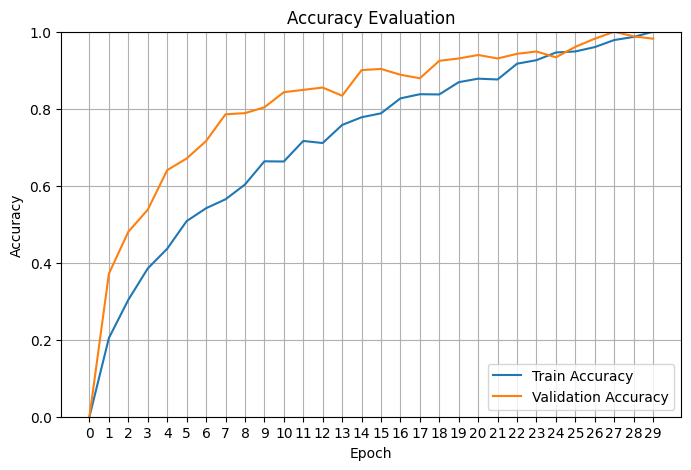

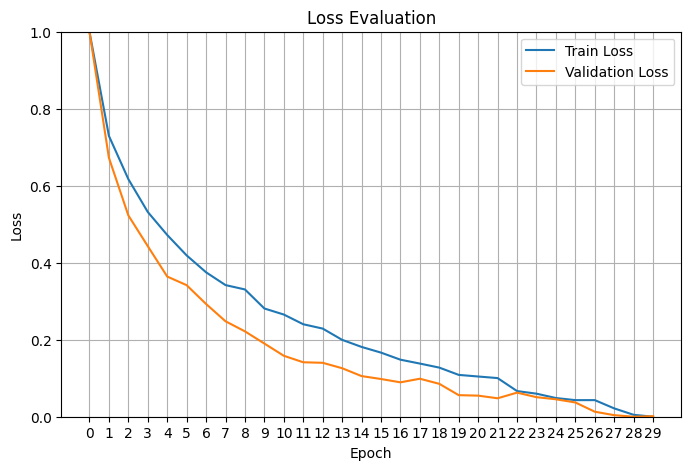

In [ ]:
# plot accuracy/error for training and validation
plot_history(history)

In [ ]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

# predict sample
predict(model, X_to_predict, y_to_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Target: pop, Predicted label: ['pop']


***IMPLEMENTATION USING VGG 16***

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

#path
image_path = 'drive/MyDrive/GTZAN/archive/Data/images_original/'

# Create datasets
train_dataset = image_dataset_from_directory(
    image_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(128, 128),
    batch_size=32
)
val_dataset = image_dataset_from_directory(
    image_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(128, 128),
    batch_size=32
)

# Normalize
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

Found 999 files belonging to 10 classes.
Using 800 files for training.
Found 999 files belonging to 10 classes.
Using 199 files for validation.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load pre-trained VGG16
vgg16_base = VGG16(input_shape=(128, 128, 3), include_top=False, weights="imagenet")
vgg16_base.trainable = False  # Freeze base layers

# Add custom layers
modelvg = Sequential([
    vgg16_base,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 genres
])

# Compile model
modelvg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = modelvg.fit(train_dataset, validation_data=val_dataset, epochs=30, callbacks=[early_stopping])


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 181ms/step - accuracy: 0.1314 - loss: 2.6277 - val_accuracy: 0.2663 - val_loss: 2.1385
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step - accuracy: 0.2238 - loss: 2.0965 - val_accuracy: 0.2111 - val_loss: 2.0535
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.2810 - loss: 2.0045 - val_accuracy: 0.3367 - val_loss: 1.8950
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.3367 - loss: 1.8299 - val_accuracy: 0.3819 - val_loss: 1.7417
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 235ms/step - accuracy: 0.3508 - loss: 1.8304 - val_accuracy: 0.4673 - val_loss: 1.6658
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.3983 - loss: 1.7402 - val_accuracy: 0.4573 - val_loss: 1.6079
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - accuracy: 0.4514 - loss: 1.6421 - val_accuracy: 0.5075 - val_loss: 1.5665
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step - accuracy: 0.4286 - loss: 1.6257 - val_accuracy: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.5361 - loss: 1.3872


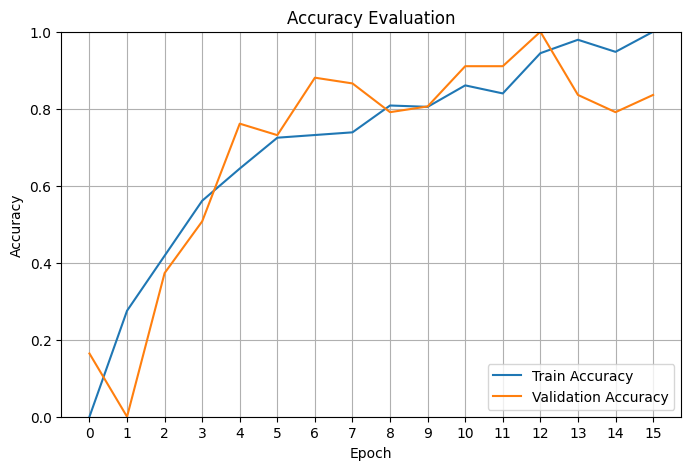

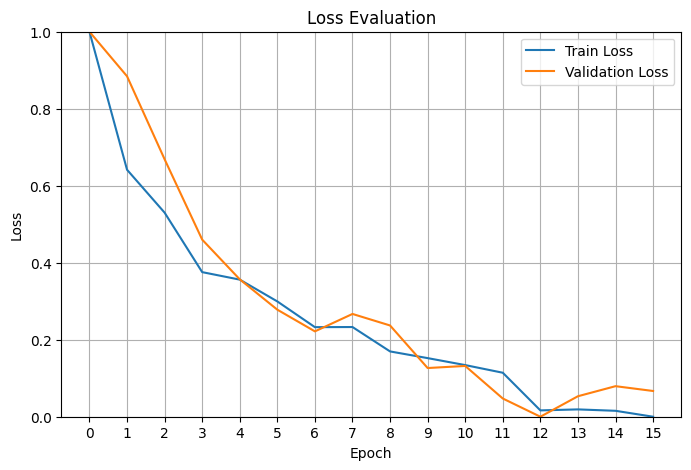

Test Accuracy: 0.5477386713027954


In [ ]:
# Evaluate
test_loss, test_acc = modelvg.evaluate(val_dataset)

plot_history(history)

print(f"Test Accuracy: {test_acc}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Get predictions
y_pred = modelvg.predict(val_dataset)  # x_test is your test dataset
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# True labels
y_true = np.concatenate([y.numpy() for _, y in val_dataset], axis=0)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


In [ ]:
cm = confusion_matrix(y_true, y_pred_classes)

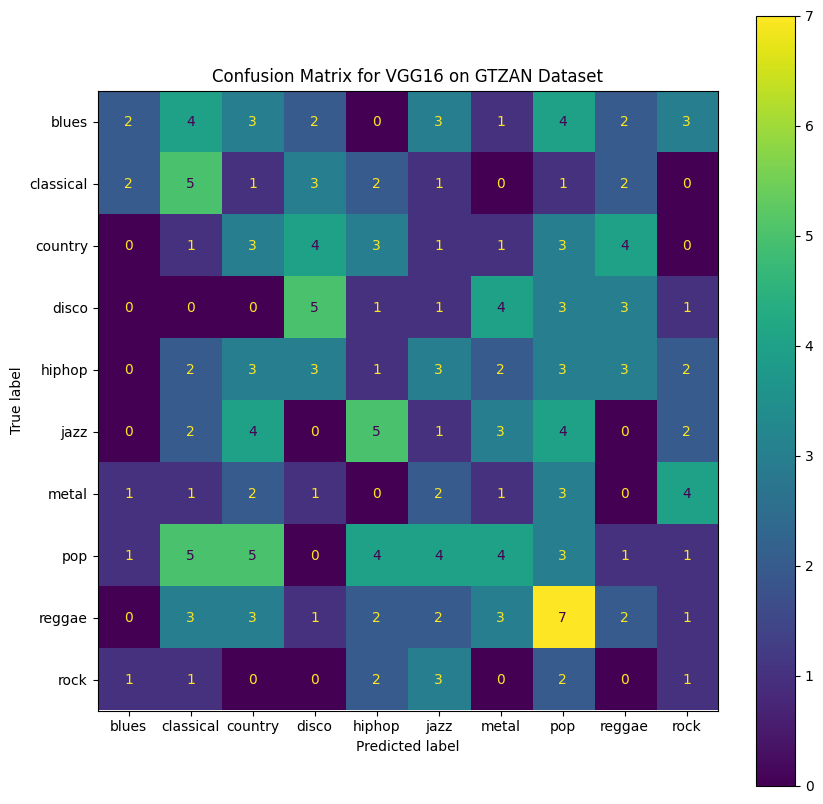

In [ ]:
# Define GTZAN genres
genres = ['blues', 'classical', 'country', 'disco', 'hiphop',
          'jazz', 'metal', 'pop', 'reggae', 'rock']

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(cmap='viridis', ax=ax, colorbar=True)

plt.title('Confusion Matrix for VGG16 on GTZAN Dataset')
plt.show()

***Resnet Implementation***

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from glob import glob
from PIL import Image

# Hyperparameters
BATCH_SIZE = 32
EPOCHS = 25
LEARNING_RATE = 0.001
IMG_SIZE = 224  # ResNet input size
NUM_CLASSES = 10

# Dataset preparation
class SpectrogramDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        label = self.labels[idx]

        # Load image
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)

        return image, label

# Load dataset
def load_spectrogram_dataset(spectrogram_path):
    genres = sorted(os.listdir(spectrogram_path))
    file_paths, labels = [], []

    for genre_idx, genre in enumerate(genres):
        genre_path = os.path.join(spectrogram_path, genre)
        for file in glob(f"{genre_path}/*.png"):  # Assuming spectrograms are saved as PNG
            file_paths.append(file)
            labels.append(genre_idx)

    return file_paths, labels

spectrogram_path = 'drive/MyDrive/GTZAN/archive/Data/images_original/'
file_paths, labels = load_spectrogram_dataset(spectrogram_path)
train_paths, val_paths, train_labels, val_labels = train_test_split(file_paths, labels, test_size=0.2, stratify=labels)

# Transforms
data_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

train_dataset = SpectrogramDataset(train_paths, train_labels, transform=data_transform)
val_dataset = SpectrogramDataset(val_paths, val_labels, transform=data_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Load ResNet model
modelrs = models.resnet18(pretrained=True)
modelrs.fc = nn.Linear(modelrs.fc.in_features, NUM_CLASSES)  # Replace the final layer
modelrs = modelrs.to('cuda' if torch.cuda.is_available() else 'cpu')

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training loop
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.to(device)

    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }

    for epoch in range(epochs):
        model.train()
        train_loss, train_correct = 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            train_correct += (outputs.argmax(1) == labels).sum().item()

        val_loss, val_correct = 0, 0
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()
                val_correct += (outputs.argmax(1) == labels).sum().item()

        print(f"Epoch {epoch+1}/{epochs} | "
              f"Train Loss: {train_loss/len(train_loader):.4f} | Train Acc: {train_correct/len(train_dataset):.4f} | "
              f"Val Loss: {val_loss/len(val_loader):.4f} | Val Acc: {val_correct/len(val_dataset):.4f}")

        history['train_loss'].append(train_loss/len(train_loader))
        history['train_acc'].append(train_correct/len(train_dataset))
        history['val_loss'].append(val_loss/len(val_loader))
        history['val_acc'].append(val_correct/len(val_dataset))

    return history

# Train the model
history = train_model(modelrs, train_loader, val_loader, criterion, optimizer, EPOCHS)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/25 | Train Loss: 2.4897 | Train Acc: 0.1051 | Val Loss: 2.4191 | Val Acc: 0.1100
Epoch 2/25 | Train Loss: 2.4907 | Train Acc: 0.1076 | Val Loss: 2.4459 | Val Acc: 0.1000
Epoch 3/25 | Train Loss: 2.4859 | Train Acc: 0.1026 | Val Loss: 2.4472 | Val Acc: 0.0900
Epoch 4/25 | Train Loss: 2.4873 | Train Acc: 0.1014 | Val Loss: 2.4489 | Val Acc: 0.0950
Epoch 5/25 | Train Loss: 2.4881 | Train Acc: 0.1076 | Val Loss: 2.4455 | Val Acc: 0.1000
Epoch 6/25 | Train Loss: 2.4825 | Train Acc: 0.1014 | Val Loss: 2.4424 | Val Acc: 0.1000
Epoch 7/25 | Train Loss: 2.4899 | Train Acc: 0.1014 | Val Loss: 2.4443 | Val Acc: 0.0950
Epoch 8/25 | Train Loss: 2.4877 | Train Acc: 0.1064 | Val Loss: 2.4463 | Val Acc: 0.0950
Epoch 9/25 | Train Loss: 2.4906 | Train Acc: 0.1101 | Val Loss: 2.4434 | Val Acc: 0.0900
Epoch 10/25 | Train Loss: 2.4858 | Train Acc: 0.1026 | Val Loss: 2.4453 | Val Acc: 0.0950
Epoch 11/25 | Train Loss: 2.4948 | Train Acc: 0.1026 | Val Loss: 2.4442 | Val Acc: 0.1000
Epoch 12/25 | Train

In [ ]:
train_paths, temp_paths, train_labels, temp_labels = train_test_split(file_paths, labels, test_size=0.3, stratify=labels)
val_paths, test_paths, val_labels, test_labels = train_test_split(temp_paths, temp_labels, test_size=0.5, stratify=temp_labels)

In [ ]:
test_dataset = SpectrogramDataset(test_paths, test_labels, transform=data_transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [ ]:
def evaluate_model(model, data_loader, criterion):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    model.to(device)
    model.eval()

    all_preds = []
    all_labels = []

    loss, correct = 0, 0
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)

            # Collect predictions and true labels
            all_preds.extend(outputs.argmax(1).cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            loss += criterion(outputs, labels).item()
            correct += (outputs.argmax(1) == labels).sum().item()

    total = len(data_loader.dataset)
    accuracy = correct / total
    return loss / len(data_loader), accuracy, all_preds, all_labels

In [ ]:
def plot_training_history(history):
    import numpy as np

    epochs = range(1, len(history['train_loss']) + 1)
    y_min, y_max = 0, 1  # Set y-axis limits

    # Normalize values
    def normalize(values):
        min_val, max_val = min(values), max(values)
        if max_val - min_val == 0:  # Prevent division by zero
            return np.zeros_like(values)  # Return all zeros if no variation
        return [(v - min_val) / (max_val - min_val) for v in values]

    # Normalize loss and accuracy values
    train_loss_norm = normalize(history['train_loss'])
    val_loss_norm = normalize(history['val_loss'])
    train_acc_norm = normalize(history['train_acc'])
    val_acc_norm = normalize(history['val_acc'])

    # Plot Loss
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_loss_norm, label="Train Loss")
    plt.plot(epochs, val_loss_norm, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss Over Epochs")
    plt.legend()
    plt.ylim(y_min, y_max)  # Set y-axis limits
    plt.grid()
    plt.show()

    # Plot Accuracy
    plt.figure(figsize=(8, 5))
    plt.plot(epochs, train_acc_norm, label="Train Accuracy")
    plt.plot(epochs, val_acc_norm, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Over Epochs")
    plt.legend()
    plt.ylim(y_min, y_max)  # Set y-axis limits
    plt.grid()
    plt.show()


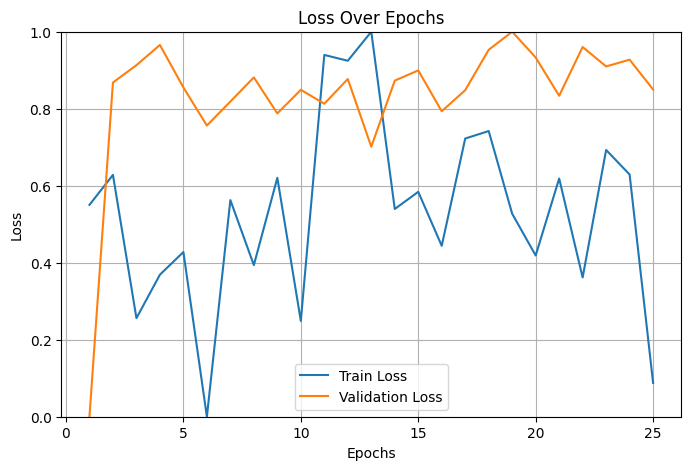

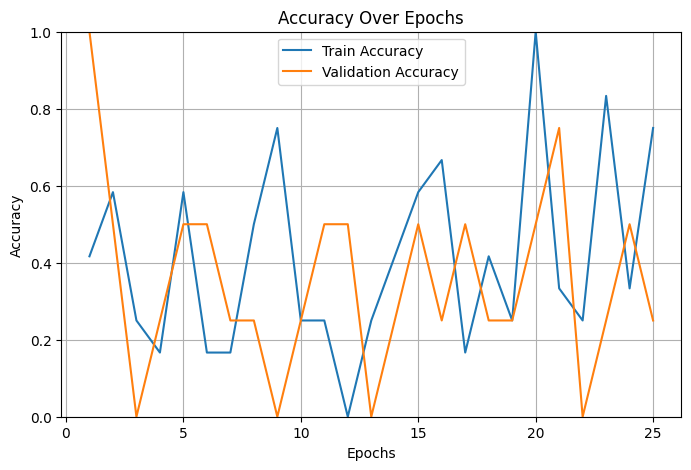

Test Loss: 0.2912 | Test Accuracy: 0.9200


In [ ]:
criterion = torch.nn.CrossEntropyLoss()  # Example criterion
test_loss, test_accuracy, y_pred, y_true = evaluate_model(model, test_loader, criterion)

plot_training_history(history)

print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}")

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

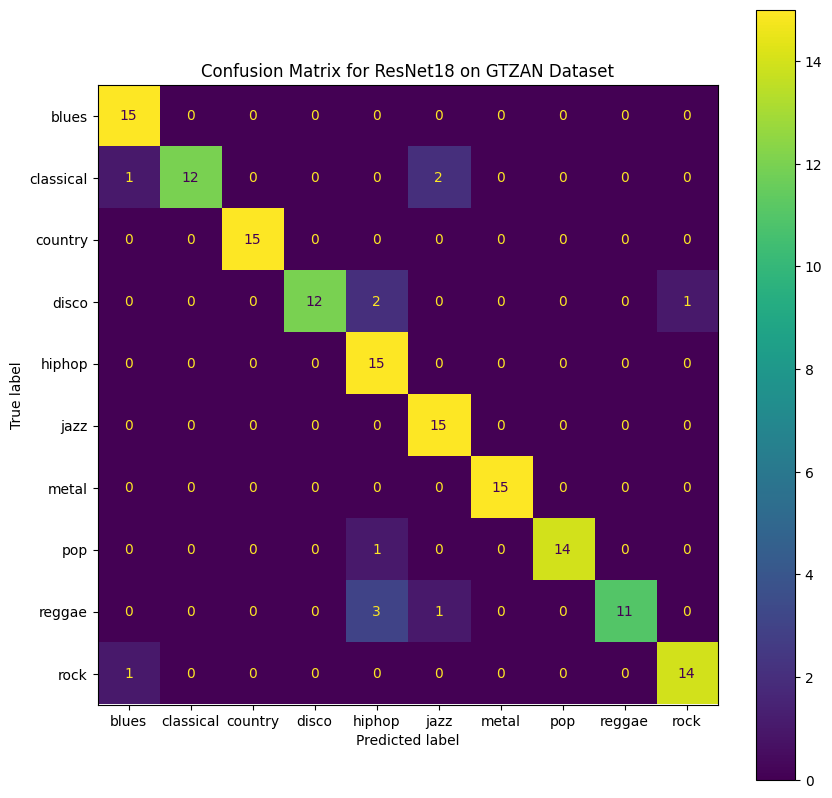

In [ ]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop',
          'jazz', 'metal', 'pop', 'reggae', 'rock']

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(cmap='viridis', ax=ax, colorbar=True)

plt.title('Confusion Matrix for ResNet18 on GTZAN Dataset')
plt.show()